In [85]:
import requests

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [104]:
import bs4
import pandas as pd
import asyncio
import aiohttp

columns = ["title", "location", "area", "bed", "bath", "price"]


def append(df: pd.DataFrame, text: str) -> pd.DataFrame:
    soup = bs4.BeautifulSoup(text)
    prices = soup.findAll("span", {"aria-label" : "Price"}) # price
    areas = soup.findAll("span", {"aria-label": "Area"}) # area
    beds = soup.findAll("span", {"aria-label": "Beds"}) # beds
    baths = soup.findAll("span", {"aria-label": "Baths"}) # baths
    titles = soup.findAll("h2", {"aria-label" : "Title"}) # title
    locations = soup.findAll("div", {"aria-label" : "Location"}) # locations
    new_df = pd.DataFrame(
        map(
            lambda x: (v.get_text() for v in x), 
            zip(titles, locations, areas, beds, baths, prices)
           ), 
        columns=columns
    )
    return pd.concat([df, new_df], ignore_index=True)


async def fetch(url, session):
    async with session.get(url) as resp:
        return await resp.text()
    
async def fetch_all(urls, headers):
    async with aiohttp.ClientSession(headers=headers) as session:
        results = await asyncio.gather(
            *[fetch(url, session) for url in urls]
        )
        return results

In [96]:

df = pd.DataFrame([], columns=columns) # new empty df
pages = range(1, 240)


urls = [f"https://baan.kaidee.com/c15p9-realestate-home/bangkok/p-{page}?condition=2" for page in pages]
responses = await fetch_all(urls, headers)
    
for resp in responses:
    df = append(df, resp)

df.reset_index(inplace=True, drop=True) 
df

,Title,Location,Area,Bed,Bath,Price
0,ขายบ้านเดี่ยว เพอร์เฟคเพลส รามคําแหง ซอยรามคำแ...,"ลาดกระบัง, ลาดกระบัง, กรุงเทพมหานคร",176 ตร.ว.,4,3,"10,300,000"
1,บ้านเดี่ยว 2 ชั้น 100 ตร. ว. หมู่บ้านเดอะทัสคา...,"สามวาตะวันตก, คลองสามวา, กรุงเทพมหานคร",100 ตร.ว.,4,4,"8,500,000"
2,บ้านเดี่ยว 2 ชั้น 91 ตร. ว. ใกล้วัดหลักสี่ ไ...,"ทุ่งสองห้อง, หลักสี่, กรุงเทพมหานคร",91 ตร.ว.,5,4,"8,900,000"
3,บ้านเดี่ยว 2 ชั้น 57 ตร. ว. หมู่บ้านเพอร์เฟคเพ...,"มีนบุรี, มีนบุรี, กรุงเทพมหานคร",57 ตร.ว.,3,2,"4,200,000"
4,บ้านเดี่ยว 2 ชั้น 51.2 ตร. ว. เพอร์เฟค เพลส ...,"ออเงิน, สายไหม, กรุงเทพมหานคร",51.3 ตร.ว.,3,2,"5,100,000"
...,...,...,...,...,...,...
5580,ตึกแถว 3.5 ชั้น,"ทุ่งครุ, ทุ่งครุ, กรุงเทพมหานคร",20 ตร.ว.,3,2,"3,500,000"
5581,บ้านเดี่ยว 145 ตารางวา ติดถนนใหญ่ ถนนรามคำแหง 102,"สะพานสูง, สะพานสูง, กรุงเทพมหานคร",145 ตร.ว.,4,3,"12,000,000"
5582,ขายบ้านเดี่ยวทำเลทอง,"ประเวศ, ประเวศ, กรุงเทพมหานคร",56 ตร.ว.,3,3,"7,390,000"
5583,บ้านเดี่ยว 2 ชั้น 60 ตรว.,"ลาดกระบัง, ลาดกระบัง, กรุงเทพมหานคร",60 ตร.ว.,4,2,"3,300,000"


In [1]:
import pandas as pd

df = pd.read_csv("baan-kaidee.csv")

df["price"] = df.apply(lambda row: int(row.price.replace(",", "")), axis=1)
df["area"] = df.apply(lambda row: float(row.area.replace(" ตร.ว.", "").replace(",", "")), axis=1)
df

,title,location,area,bed,bath,price
0,ขายบ้านเดี่ยว เพอร์เฟคเพลส รามคําแหง ซอยรามคำแ...,"ลาดกระบัง, ลาดกระบัง, กรุงเทพมหานคร",176.0,4,3,10300000
1,บ้านเดี่ยว 2 ชั้น 100 ตร. ว. หมู่บ้านเดอะทัสคา...,"สามวาตะวันตก, คลองสามวา, กรุงเทพมหานคร",100.0,4,4,8500000
2,บ้านเดี่ยว 2 ชั้น 91 ตร. ว. ใกล้วัดหลักสี่ ไ...,"ทุ่งสองห้อง, หลักสี่, กรุงเทพมหานคร",91.0,5,4,8900000
3,บ้านเดี่ยว 2 ชั้น 57 ตร. ว. หมู่บ้านเพอร์เฟคเพ...,"มีนบุรี, มีนบุรี, กรุงเทพมหานคร",57.0,3,2,4200000
4,บ้านเดี่ยว 2 ชั้น 51.2 ตร. ว. เพอร์เฟค เพลส ...,"ออเงิน, สายไหม, กรุงเทพมหานคร",51.3,3,2,5100000
...,...,...,...,...,...,...
5580,ตึกแถว 3.5 ชั้น,"ทุ่งครุ, ทุ่งครุ, กรุงเทพมหานคร",20.0,3,2,3500000
5581,บ้านเดี่ยว 145 ตารางวา ติดถนนใหญ่ ถนนรามคำแหง 102,"สะพานสูง, สะพานสูง, กรุงเทพมหานคร",145.0,4,3,12000000
5582,ขายบ้านเดี่ยวทำเลทอง,"ประเวศ, ประเวศ, กรุงเทพมหานคร",56.0,3,3,7390000
5583,บ้านเดี่ยว 2 ชั้น 60 ตรว.,"ลาดกระบัง, ลาดกระบัง, กรุงเทพมหานคร",60.0,4,2,3300000


16500000.0 46750000.0 -19250000.0


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


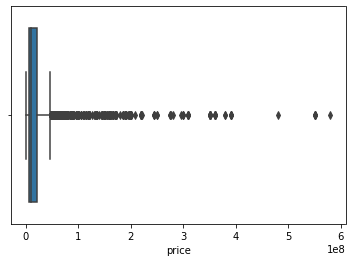

In [18]:
df
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# plt.figure(figsize=(16,5))
sns.boxplot(df['price'])
# plt.show()

# np.where(df['price'] > 0.5* 1e8)
# 4* 1e8

arr1 = df['price']
# finding the 1st quartile
q1 = np.quantile(arr1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(arr1, 0.75)
med = np.median(arr1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

In [24]:
cleaned_df = df[df["price"] < 46750000.0]
cleaned_df = cleaned_df.drop('title', 1)
cleaned_df = cleaned_df.drop('location', 1)
cleaned_df

/var/folders/4b/g9wl8fh13cj4rssgxfxp_wpw0000gn/T/ipykernel_10416/2074766560.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cleaned_df = cleaned_df.drop('title', 1)
/var/folders/4b/g9wl8fh13cj4rssgxfxp_wpw0000gn/T/ipykernel_10416/2074766560.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  cleaned_df = cleaned_df.drop('location', 1)


,area,bed,bath,price
0,176.0,4,3,10300000
1,100.0,4,4,8500000
2,91.0,5,4,8900000
3,57.0,3,2,4200000
4,51.3,3,2,5100000
...,...,...,...,...
5580,20.0,3,2,3500000
5581,145.0,4,3,12000000
5582,56.0,3,3,7390000
5583,60.0,4,2,3300000


In [30]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df
test_df

,area,bed,bath,price
4180,58.8,5,3,5500000
131,63.0,3,2,5700000
1522,68.0,3,3,45000000
2840,128.5,5,5,14500000
4538,98130.9,3,2,3650000
...,...,...,...,...
613,87.5,4,5,14000000
4413,88.0,3,4,18000000
1266,73.0,4,3,12900000
1655,40.0,3,3,9100000


In [48]:
from sklearn import linear_model
X = train_df[['area', 'bed', 'bath']]
y = train_df['price']

model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [49]:
from sklearn import metrics

x_test = test_df[['area', 'bed', 'bath']]
y_test = test_df['price']

model.score(X_test, y_test)

0.28851689976682104